This computes the distribution of note durations across the entire dataset

In [1]:
%cd ../..

/home/napulen/AugmentedNet-Copy


In [9]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 5)

In [3]:
summary = "dataset/dataset_summary.tsv"
dfsummary = pd.read_csv(summary, sep="\t")

In [4]:
training = dfsummary[dfsummary.split == "training"]

In [5]:
df = None
for nickname in training.file:
    tsvpath = os.path.join("dataset", "training", f"{nickname}.tsv")
    print(tsvpath)
    dffile = pd.read_csv(tsvpath, sep="\t")
    dffile = dffile[dffile.s_isOnset.apply(lambda x: sum(eval(x)) > 0)]
    if df is None:
        df = dffile
    else:
        df = pd.concat([df, dffile], ignore_index=True)

dataset/training/bps-02-op002-no2-1.tsv
dataset/training/bps-03-op002-no3-1.tsv
dataset/training/bps-04-op007-1.tsv
dataset/training/bps-05-op010-no1-1.tsv
dataset/training/bps-09-op014-no1-1.tsv
dataset/training/bps-11-op022-1.tsv
dataset/training/bps-12-op026-1.tsv
dataset/training/bps-13-op027-no1-1.tsv
dataset/training/bps-17-op031-no2-1.tsv
dataset/training/bps-18-op031-no3-1.tsv
dataset/training/bps-21-op053-1.tsv
dataset/training/bps-22-op054-1.tsv
dataset/training/bps-24-op078-1.tsv
dataset/training/bps-27-op090-1.tsv
dataset/training/bps-28-op101-1.tsv
dataset/training/bps-30-op109-1.tsv
dataset/training/bps-31-op110-1.tsv
dataset/training/bps-32-op111-1.tsv
dataset/training/wirwtc-bach-wtc-i-1.tsv
dataset/training/wirwtc-bach-wtc-i-2.tsv
dataset/training/wirwtc-bach-wtc-i-4.tsv
dataset/training/wirwtc-bach-wtc-i-5.tsv
dataset/training/wirwtc-bach-wtc-i-6.tsv
dataset/training/wirwtc-bach-wtc-i-10.tsv
dataset/training/wirwtc-bach-wtc-i-13.tsv
dataset/training/wirwtc-bach-wtc-i-

In [6]:
df

,j_offset,s_duration,s_measure,s_notes,s_intervals,s_isOnset,a_measure,a_duration,a_annotationNumber,a_romanNumeral,...,a_localKey,a_tonicizedKey,a_degree1,a_degree2,measureMisalignment,qualityScoreNotes,qualityNonChordTones,qualityMissingChordTones,qualitySquaredSum,incongruentBass
0,0.000,0.500,0.0,"['A3', 'A4', 'A5']","['P1', 'P1']","[True, True, True]",0.0,0.5,0.0,I,...,A,A,1,None,False,"['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', ...",0.00,0.67,0.44,0.0
1,0.500,1.000,1.0,"['E3', 'E4', 'E5']","['P1', 'P1']","[True, True, True]",1.0,2.0,1.0,I,...,A,A,1,None,False,"['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', ...",0.09,0.33,0.18,1.0
2,2.000,0.125,1.0,"['E3', 'E4']",['P1'],"[True, True]",1.0,2.0,1.0,I,...,A,A,1,None,False,"['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', ...",0.09,0.33,0.18,1.0
3,2.125,0.125,1.0,"['D3', 'D4']",['P1'],"[True, True]",1.0,2.0,1.0,I,...,A,A,1,None,False,"['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', ...",0.09,0.33,0.18,1.0
4,2.250,0.125,1.0,"['C#3', 'C#4']",['P1'],"[True, True]",1.0,2.0,1.0,I,...,A,A,1,None,False,"['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', ...",0.09,0.33,0.18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225458,1167.000,0.500,292.0,"['D2', 'F#4', 'F#5']","['M3', 'M3']","[True, True, True]",290.0,4.0,448.0,I,...,D,D,1,None,True,"['D', 'D', 'F#', 'A', 'D', 'D', 'D', 'F#', 'A'...",0.00,0.00,0.00,0.0
225459,1167.500,0.500,292.0,"['D3', 'F#4', 'F#5']","['M3', 'M3']","[True, False, False]",290.0,4.0,448.0,I,...,D,D,1,None,True,"['D', 'D', 'F#', 'A', 'D', 'D', 'D', 'F#', 'A'...",0.00,0.00,0.00,0.0
225460,1168.000,2.000,293.0,"['D2', 'D3', 'D4', 'D5']","['P1', 'P1', 'P1']","[True, True, True, True]",290.0,4.0,448.0,I,...,D,D,1,None,True,"['D', 'D', 'F#', 'A', 'D', 'D', 'D', 'F#', 'A'...",0.00,0.00,0.00,0.0
225461,1170.000,2.000,293.0,"['D2', 'D3', 'D4', 'D5']","['P1', 'P1', 'P1']","[True, True, True, True]",290.0,4.0,448.0,I,...,D,D,1,None,True,"['D', 'D', 'F#', 'A', 'D', 'D', 'D', 'F#', 'A'...",0.00,0.00,0.00,0.0


<AxesSubplot:xlabel='Duration in quarter notes', ylabel='Counts'>

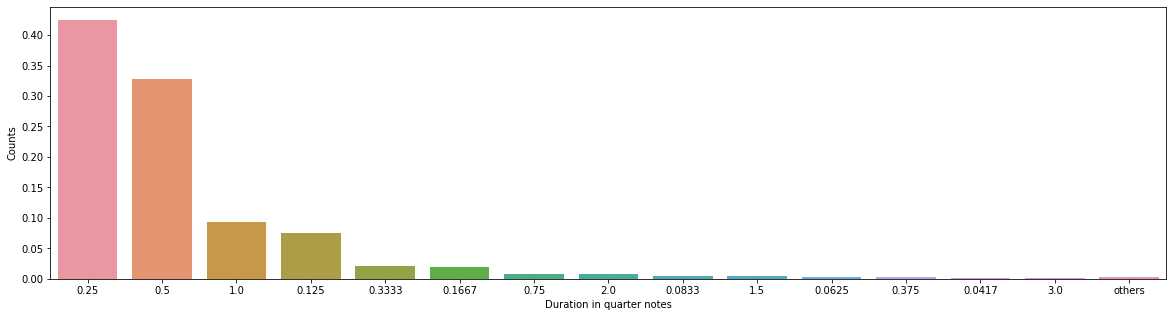

In [10]:
# durations
rows = len(df.index)
durcounts = df.s_duration.value_counts().to_dict()
durcounts = {k: (v/rows) for k, v in durcounts.items() if v > (rows * 0.001)}
durcounts["others"] = 1.0 - sum(durcounts.values())
dfrn = pd.DataFrame({"Duration in quarter notes": list(durcounts.keys()), "Counts": list(durcounts.values())})
sns.barplot(x="Duration in quarter notes", y="Counts", data=dfrn)